## Objectifs : on vodrait trouver les coefficients a,b,c,d tels que aS(t)-bS(t)R(t) = dS(t)/dt
##           -cR(t)+dS(t)R(t) = dR(t)/dt
### - S(t) : la population des proies
### - R(t) : la population des prédateurs
### - a : l'accroissement des proies en l'abscence des prédateurs
### - b : la voracité des prédateurs
### - c :facteur de moratilité des prédateurs du à la famine
### - d : appord des proies aux prédateurs

In [2]:
from classes import *
from grille import *
from jeu1_0 import *
import numpy as np
import matplotlib.pyplot as plt


pygame 2.1.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Calcul du coefficient d'accroissement des moutons en l'abscence des lions pour 10 simulations

In [3]:
from sklearn.linear_model import LinearRegression

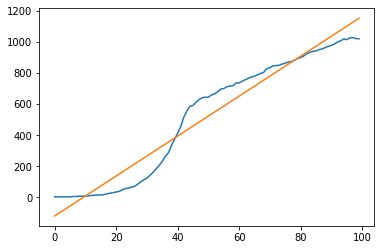

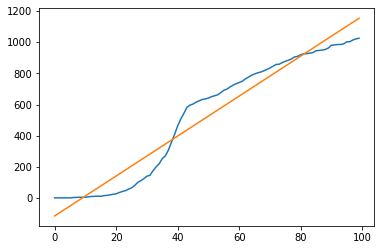

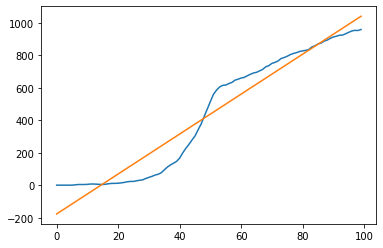

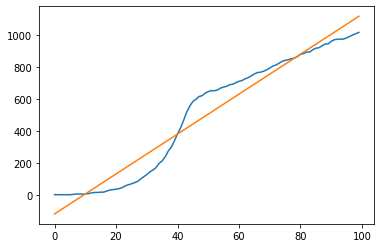

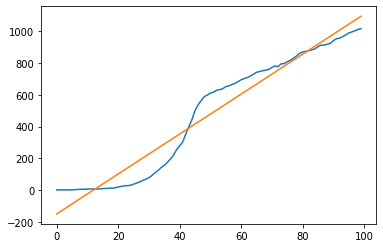

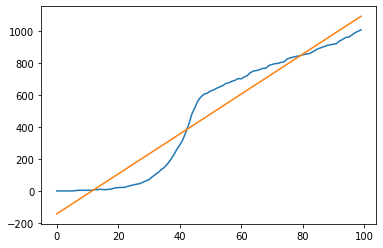

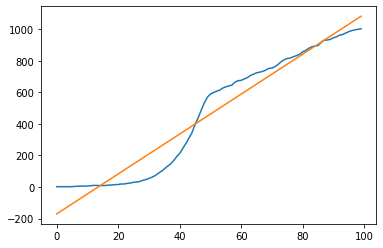

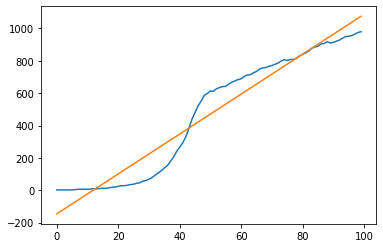

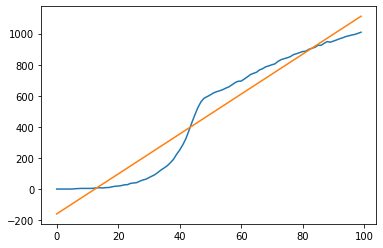

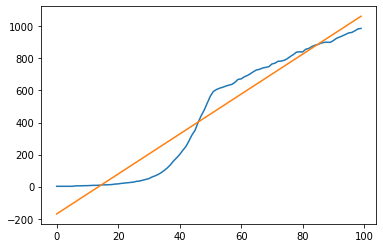

In [3]:
scores = []
for i in range(10):
    monde = Jeu_console(25,25)
    x = []
    y = []
    for j in range(100):
        x.append(j)
        y.append(len(monde.Moutons))
        monde.activite_moutons()
        
    x,y = np.array(x),np.array(y)
    x,y = x.reshape(-1,1),y.reshape(-1,1)
    model = LinearRegression()
    model.fit(x,y)
    y_fit = model.predict(x)
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,y_fit)
    x1,y1 = 40,model.predict((np.array([40])).reshape(-1,1))
    x2,y2 = 45,model.predict((np.array([45])).reshape(-1,1))
    a = float((y2 - y1)/(x2 - x1))
    scores.append(a)
        

In [4]:
print(scores)

[12.841710171017098, 12.81141914191419, 12.26507650765077, 12.487314731473157, 12.5512691269127, 12.473693369336946, 12.661092109210927, 12.34124812481249, 12.822814281428146, 12.457269726972708]


In [5]:
a = np.mean(np.array(scores))
a

12.571290729072915

#### a = 12.571290729072915


In [33]:

lions = []

for i in range(100):
    faim = random.randint(15,39)
    soif = random.randint(15,39)
    sexe = random.randint(0,1)
    lion = Carnivore('lion',faim,soif,sexe,0,0)
    lions.append(lion)


In [34]:
world = Jeu_console(25,25)
world.Lions = lions
y = []
x = []
for i in range(7):
    y.append(len(world.Lions))
    x.append(i)
    world.activite_lions()
    

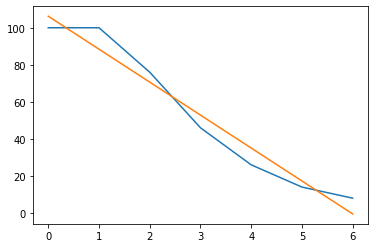

In [35]:
d = []
model = LinearRegression()
x = np.array(x)
x = x.reshape(-1,1)
model.fit(x,y)

y_pre = model.predict(x)
x1,y1 = 4,model.predict((np.array([4])).reshape(-1,1))
x2,y2 = 6,model.predict((np.array([6])).reshape(-1,1))
coef = float((y2 - y1)/(x2 - x1))
plt.plot(x,y)
plt.plot(x,y_pre)

In [36]:
coef

-17.785714285714285

### c le facteur de mortalité des prédateurs = 17.785714285714285

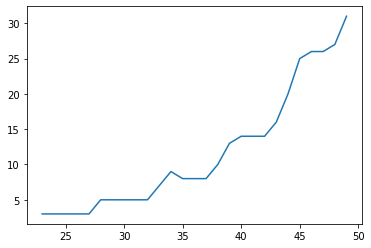

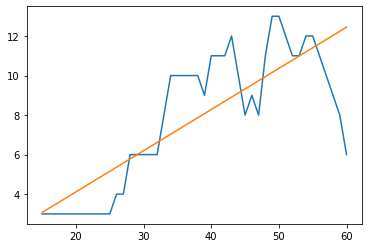

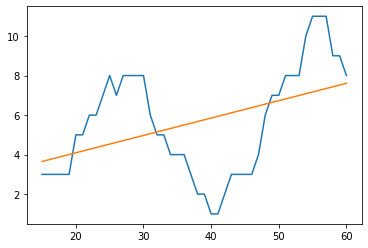

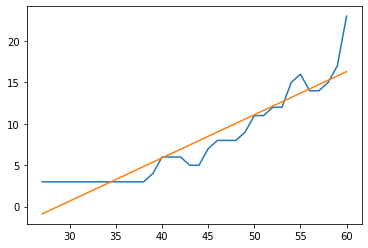

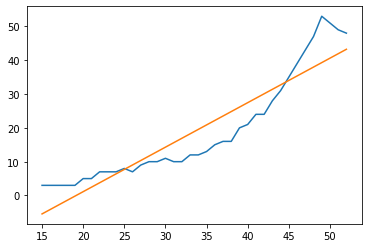

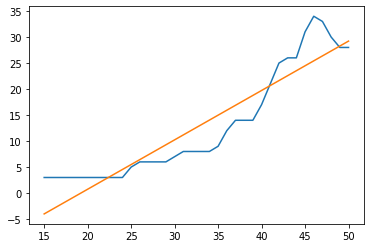

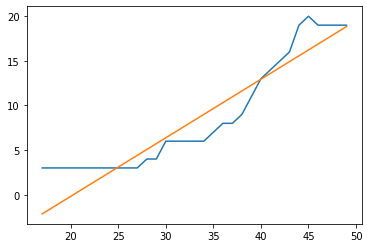

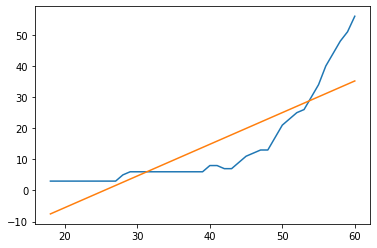

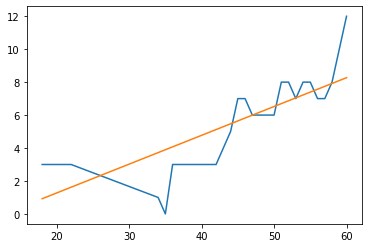

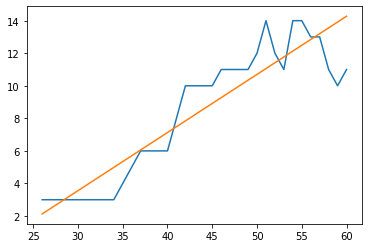

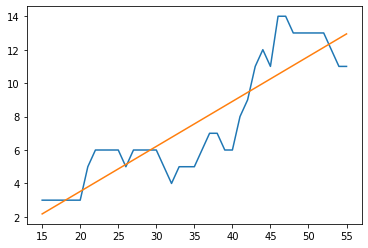

In [37]:
coefs = []
for j in range(10):

    monde = Jeu_console(30,30)

    i = 0
    x = []
    y = []
    while i <= 60 and len(monde.Moutons) != 0:
        monde.activite_moutons()
        monde.activite_lions()
        if len(monde.Moutons) >= 20:
            x.append(i)
            y.append(len(monde.Lions))
        i += 1
    a = x
    b = y
    
    

    model = LinearRegression()
    a = np.array(a).reshape(-1,1)
    b = np.array(b).reshape(-1,1)
    model.fit(a,b)
    b_ = model.predict(a)
    x1,y1 = 20,model.predict((np.array([20])).reshape(-1,1))
    x2,y2 = 30,model.predict((np.array([30])).reshape(-1,1))
    coef = float((y2 - y1)/(x2 - x1))
    coefs.append(coef)
    plt.figure()
    plt.plot(a,b)
    plt.plot(a,b_)

In [38]:
print(coefs)
coefs.remove(coefs[5])
np.mean(coefs)

[0.208263953129818, 0.08788159111933389, 0.5207892960302795, 1.3156800525221573, 0.9492605449617197, 0.6562820075110958, 1.0177599607548558, 0.1749404917514, 0.3571428571428571, 0.2691637630662022]


0.5445425011642915

### d, l'apport des proies aux prédateurs est de 1.3156800525221573

In [18]:
monde = Jeu_console(30,30)
moutons = []
lions = []
for i in range(20):
    faim = random.randint(25,39)
    soif = random.randint(25,39)
    sexe = random.randint(0,1)
    lion = Herbivore('mouton',faim,soif,sexe,0,0)
    moutons.append(lion)
    
for i in range(3):
    faim = random.randint(25,39)
    soif = random.randint(25,39)
    sexe = random.randint(0,1)
    lion = Carnivore('lion'+str(i),faim,soif,sexe,0,0)
    lions.append(lion)

In [19]:
monde.Lions = lions
monde.Moutons = moutons
print(monde.Lions)
x = []
y = []
y_L = []
for i in range(15):
    x.append(i)
    y.append(len(monde.Moutons))
    monde.activite_lions()
    y_L.append(len(monde.Lions))

[lion0, lion1, lion2]


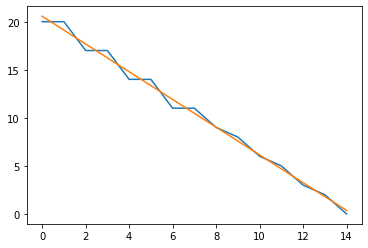

In [20]:
model = LinearRegression()
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
model.fit(x,y)
y_ = model.predict(x)
x1,y1 = 4,model.predict((np.array([4])).reshape(-1,1))
x2,y2 = 10,model.predict((np.array([10])).reshape(-1,1))
coef = float((y2 - y1)/(x2 - x1))
plt.plot(x,y)
plt.plot(x,y_)

In [21]:
coef

-1.4428571428571428

### b coefficient de mort des proies du aux prédateurs:   1.4428571428571428

In [31]:
a = 12.571290729072915
c = 20
d = 1.1940037203195093
b = 1.4428571428571428
def derive_proies(monde):
    return a*len(monde.Moutons)-b*len(monde.Moutons)*len(monde.Lions)


def derive_predateurs(monde):
    return -c * len(monde.Lions) + d * len(monde.Moutons)*len(monde.Lions)

# aS(t)-bS(t)R(t) = 0
# -cR(t)+dS(t)R(t) = 0

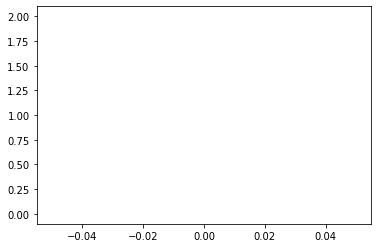

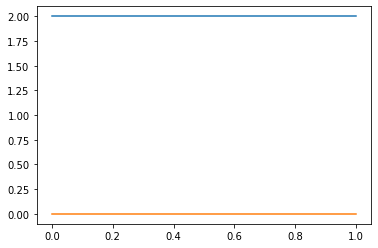

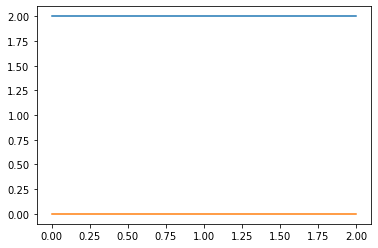

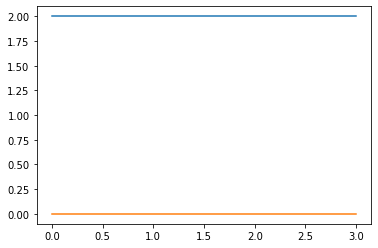

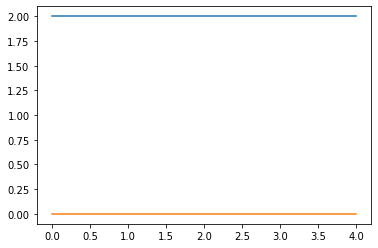

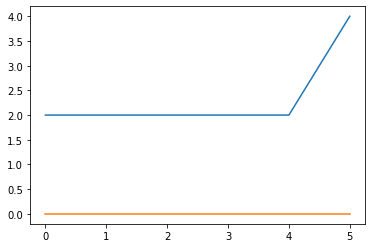

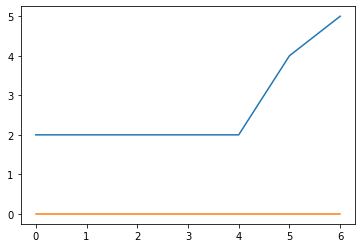

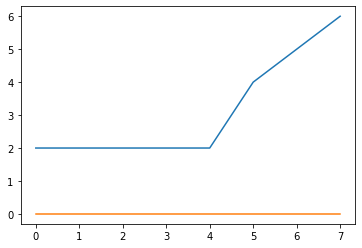

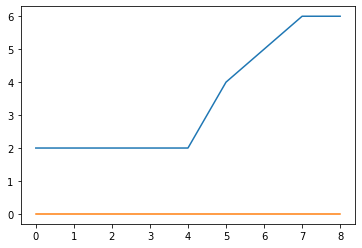

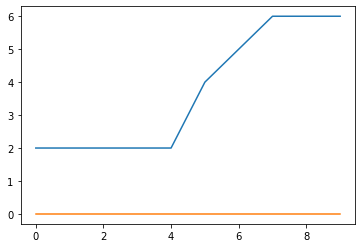

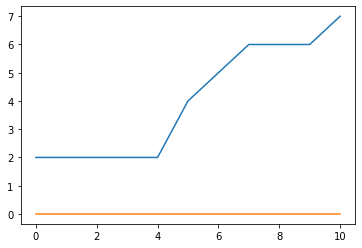

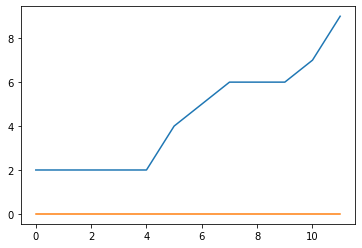

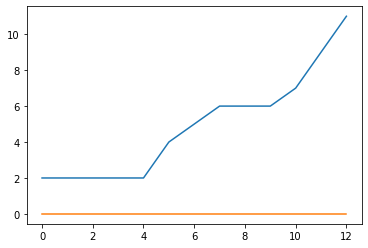

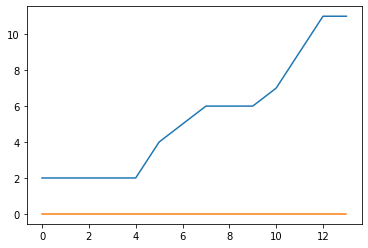

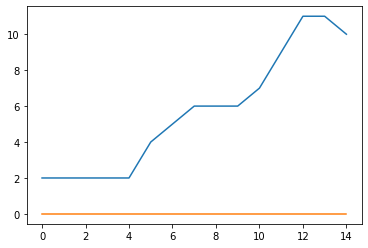

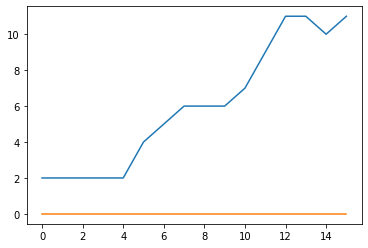

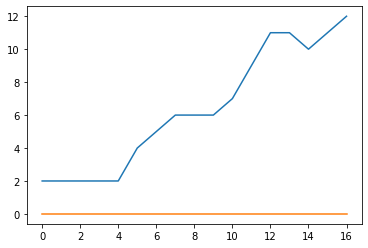

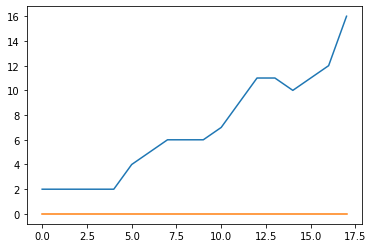

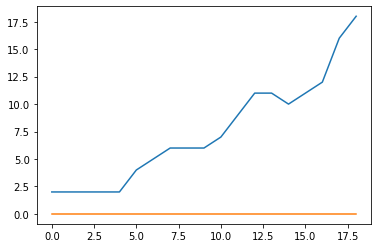

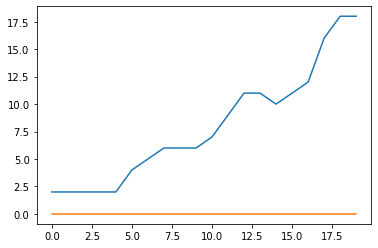

variations des moutons -69.9
variations des lions 69.22223438012908


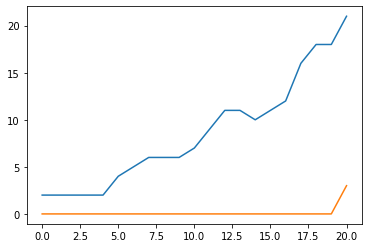

variations des moutons -69.9
variations des lions 69.22223438012908


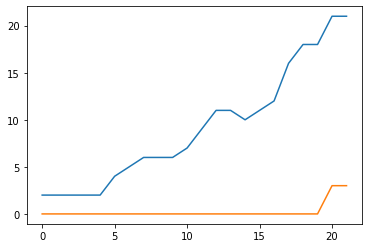

variations des moutons -79.88571428571427
variations des lions 79.96826786300467


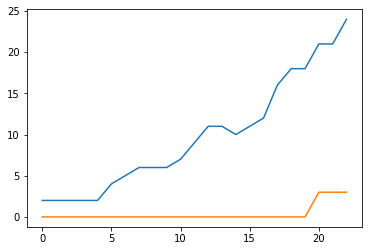

variations des moutons -86.54285714285714
variations des lions 87.13229018492173


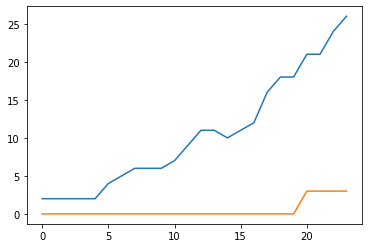

variations des moutons -89.87142857142857
variations des lions 90.71430134588026


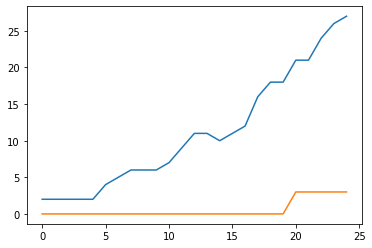

variations des moutons -89.87142857142857
variations des lions 90.71430134588026


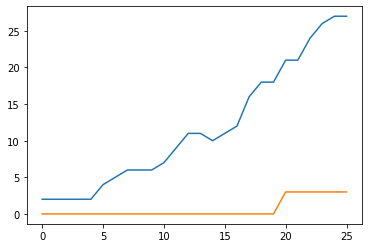

variations des moutons -93.19999999999999
variations des lions 94.29631250683877


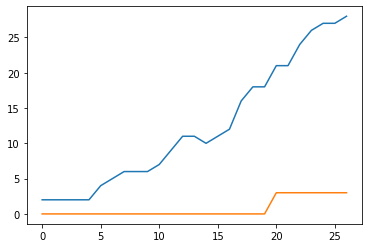

variations des moutons -96.52857142857142
variations des lions 97.8783236677973


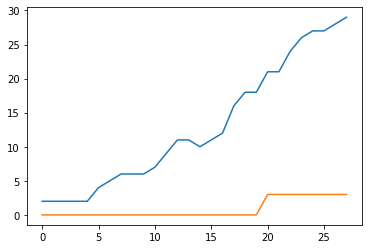

variations des moutons -99.85714285714286
variations des lions 101.46033482875585


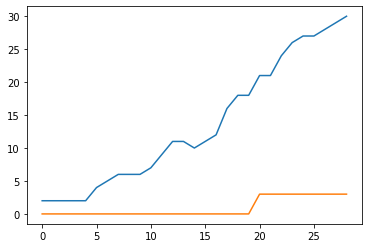

variations des moutons -89.87142857142857
variations des lions 90.71430134588026


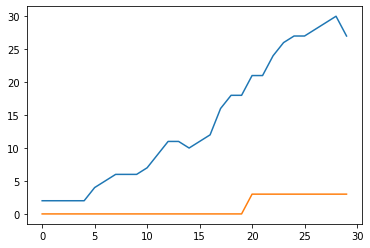

variations des moutons -103.18571428571428
variations des lions 105.04234598971436


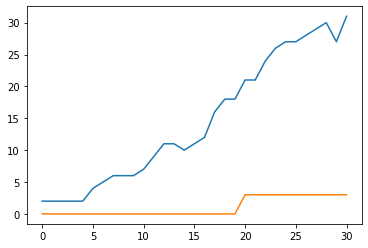

variations des moutons -167.0
variations des lions 159.1605208447313


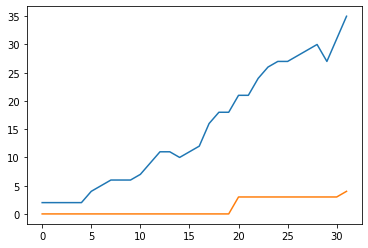

variations des moutons -171.77142857142857
variations des lions 163.93653572600934


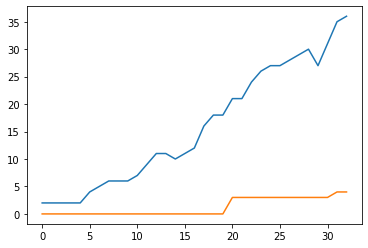

variations des moutons -290.9714285714286
variations des lions 260.23284823284814


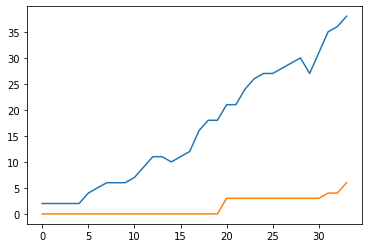

variations des moutons -283.3142857142857
variations des lions 253.06882591093108


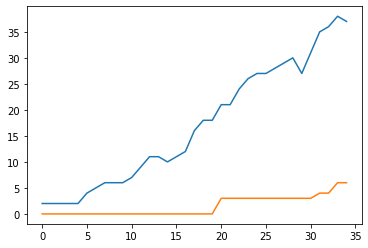

variations des moutons -275.65714285714284
variations des lions 245.90480358901402


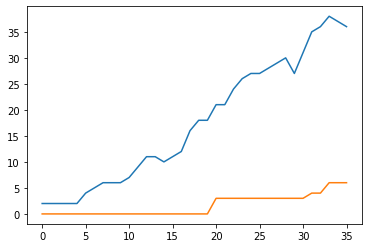

variations des moutons -344.57142857142856
variations des lions 310.3810044862675


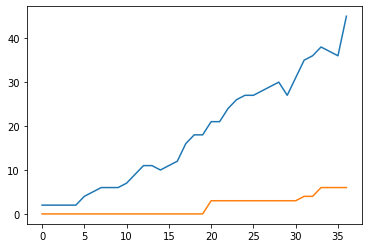

variations des moutons -375.20000000000005
variations des lions 339.03709377393574


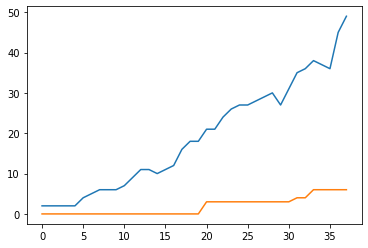

variations des moutons -590.4
variations des lions 518.9136667031402


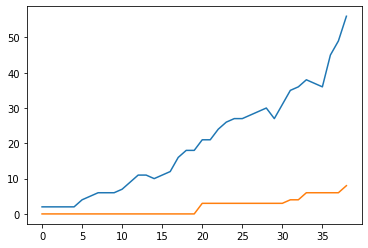

variations des moutons -725.1428571428571
variations des lions 624.7620089725351


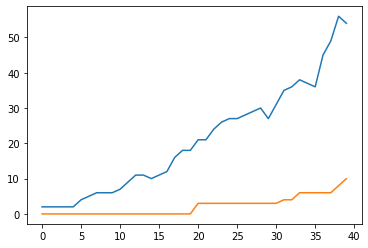

variations des moutons -765.4285714285714
variations des lions 660.5821205821203


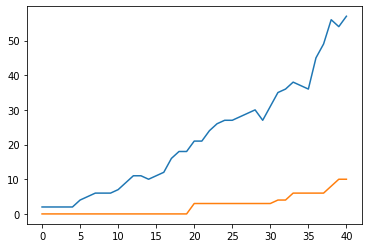

variations des moutons -877.4142857142858
variations des lions 752.9084144873616


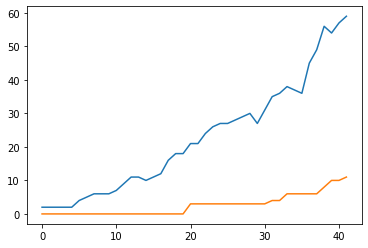

variations des moutons -1100.942857142857
variations des lions 936.3669985775246


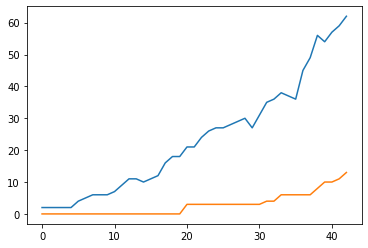

variations des moutons -1170.5428571428572
variations des lions 980.5151548309439


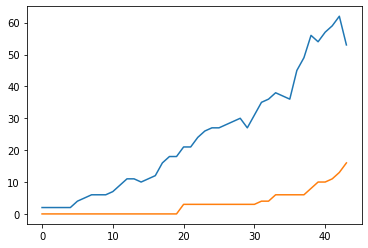

variations des moutons -1373.542857142857
variations des lions 1141.6756756756752


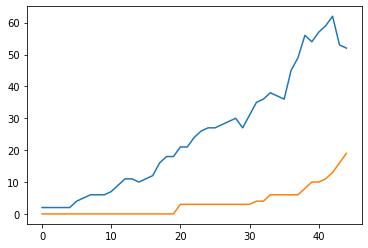

variations des moutons -1352.6857142857143
variations des lions 1111.795601269285


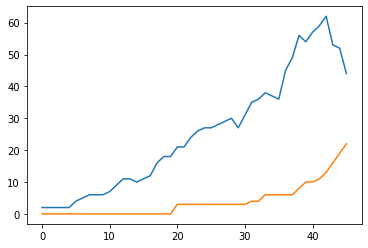

variations des moutons -1291.2
variations des lions 1059.2594375752265


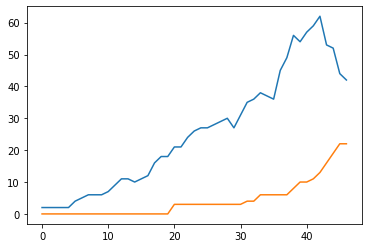

variations des moutons -1172.0
variations des lions 960.9631250683879


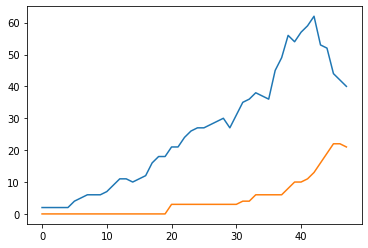

variations des moutons -996.2
variations des lions 810.5186563081296


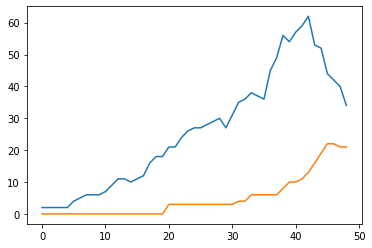

variations des moutons -780.0
variations des lions 628.6420833789252


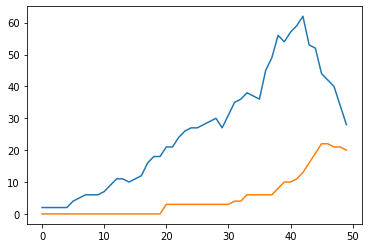

variations des moutons -640.7142857142857
variations des lions 509.2417113469743


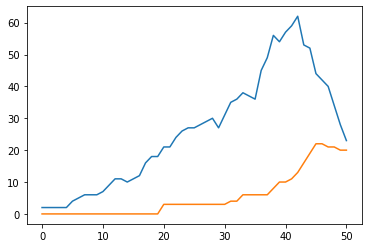

variations des moutons -445.7142857142857
variations des lions 342.081190502243


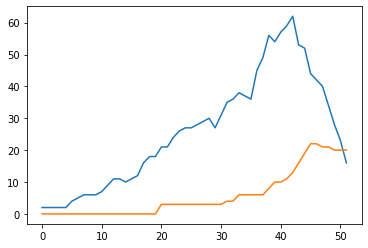

variations des moutons -264.14285714285717
variations des lions 188.86070686070676


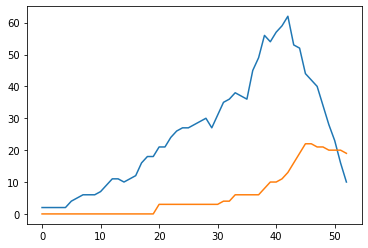

variations des moutons -70.58571428571427
variations des lions 26.894189736294976


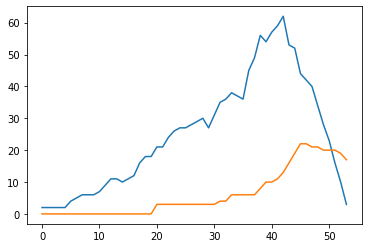

variations des moutons 0.0
variations des lions -28.0


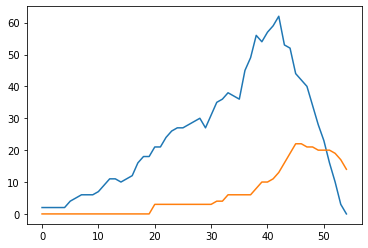

variations des moutons 0.0
variations des lions -18.0


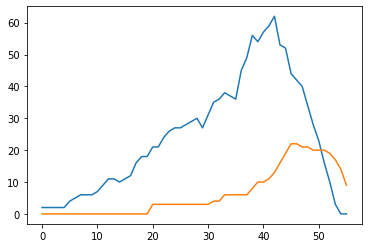

variations des moutons 0.0
variations des lions -14.0


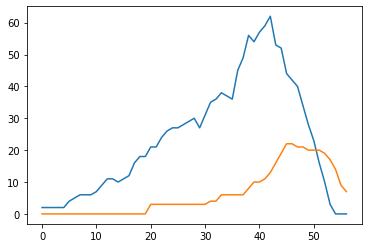

variations des moutons 0.0
variations des lions -6.0


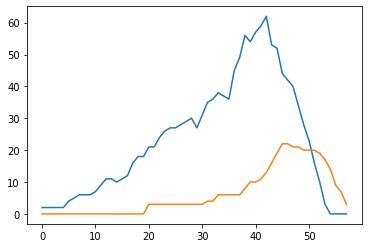

variations des moutons 0.0
variations des lions -2.0


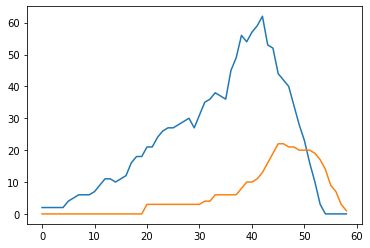

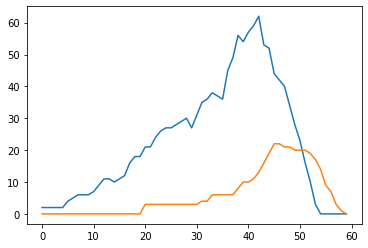

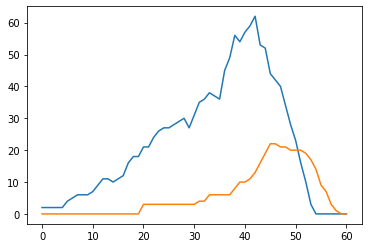

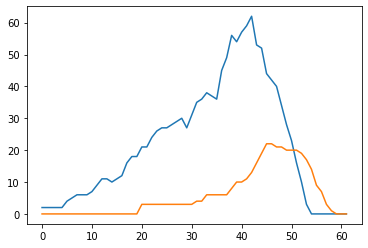

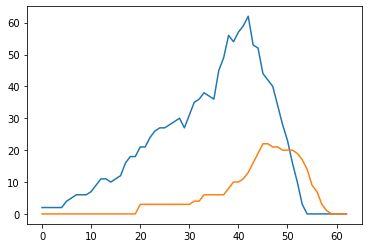

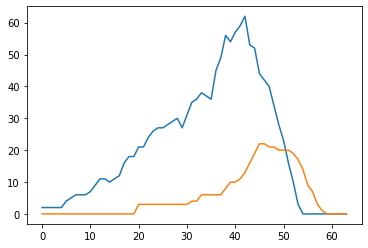

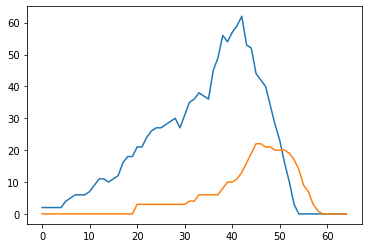

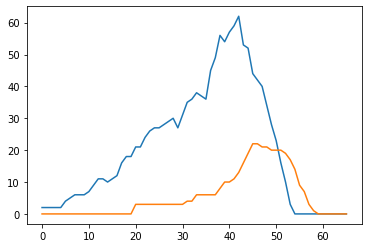

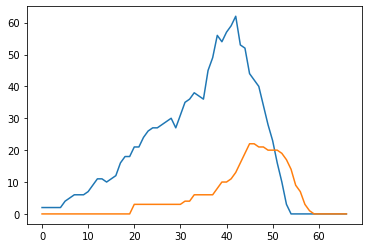

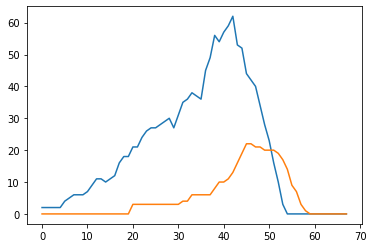

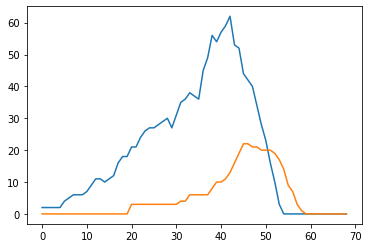

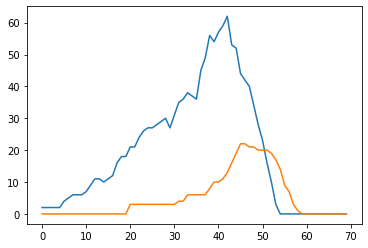

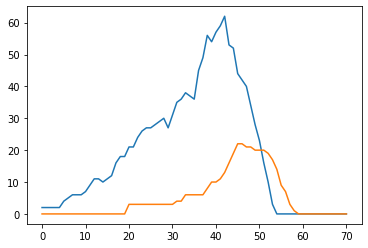

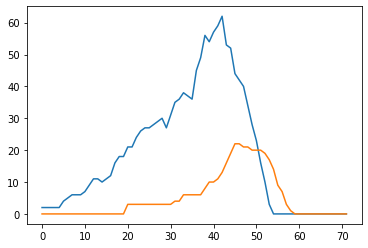

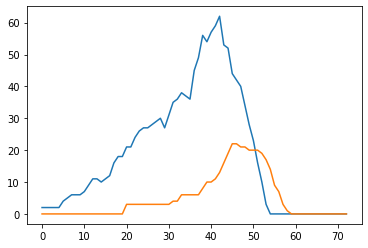

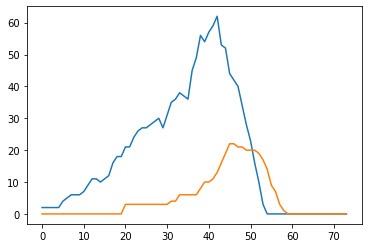

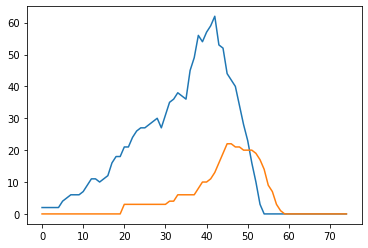

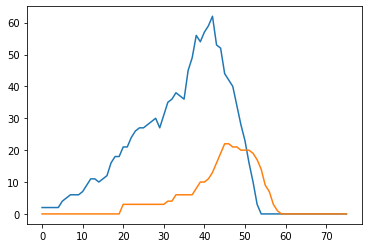

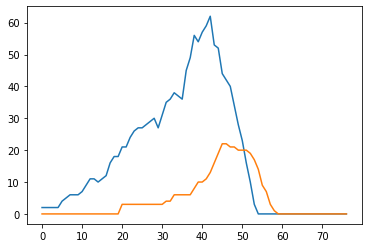

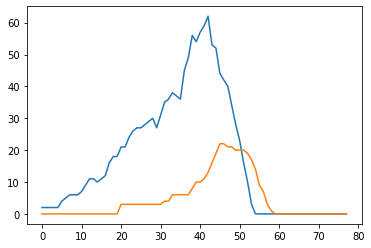

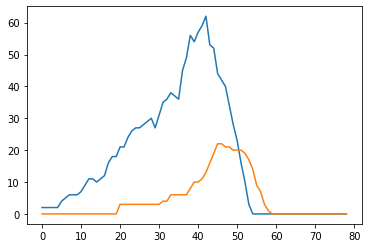

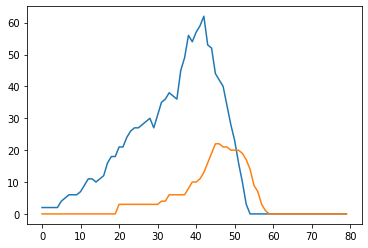

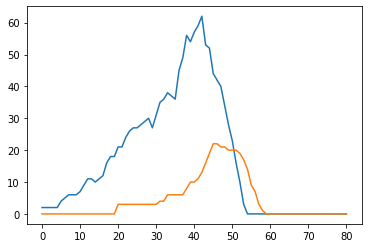

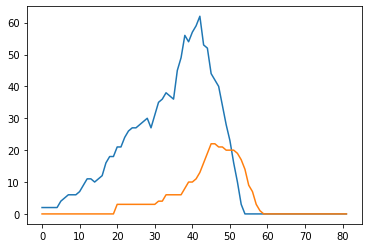

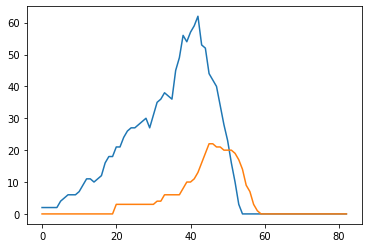

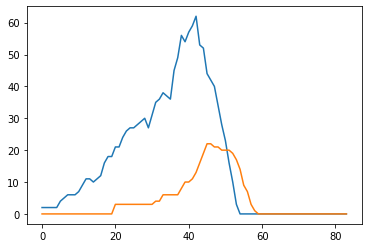

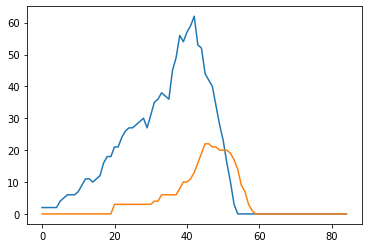

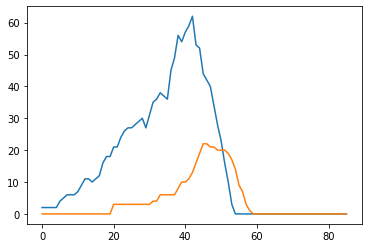

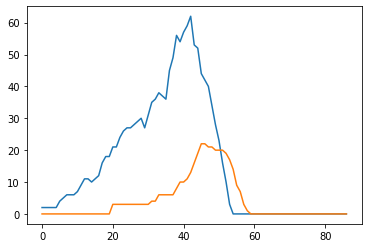

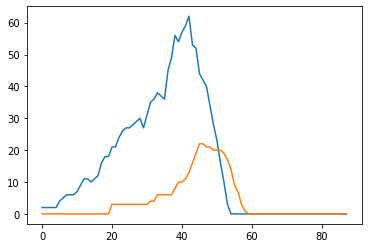

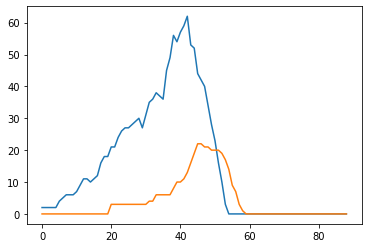

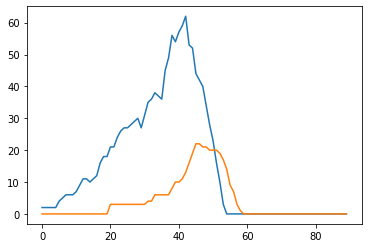

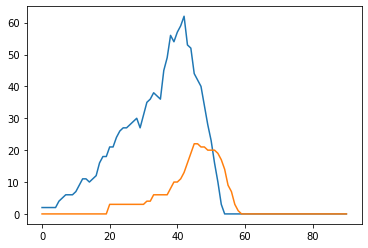

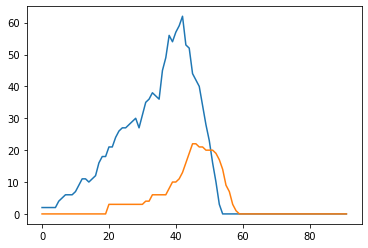

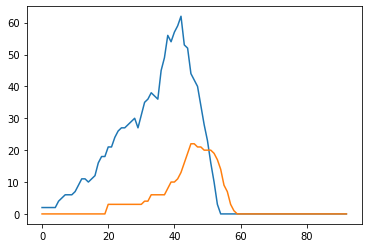

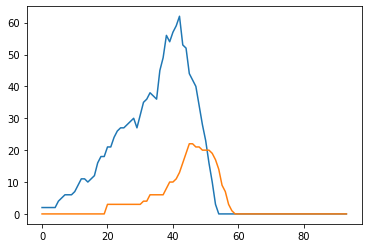

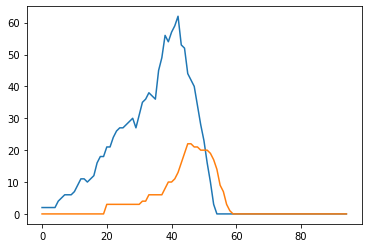

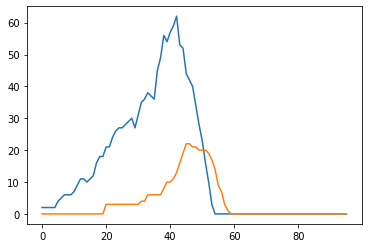

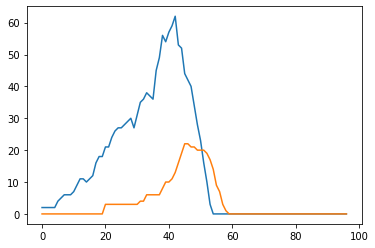

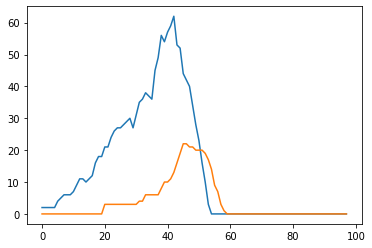

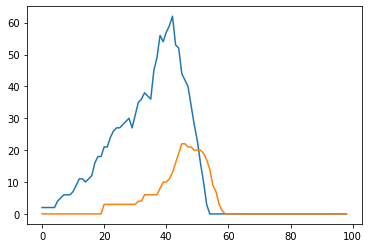

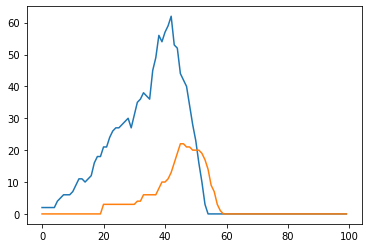

In [32]:
monde = Jeu_console(30,30)
x = []
y_l = []
y_m = []
for i in range(100):
    monde.activite_moutons()
    monde.activite_lions()
    if len(monde.Lions) != 0:    
        d_moutons = derive_proies(monde)
        d_lions = derive_predateurs(monde)
        print("variations des moutons", d_moutons)
        print("variations des lions", d_lions)
    x.append(i)
    y_l.append(len(monde.Lions))
    y_m.append(len(monde.Moutons))
    plt.plot(x,y_m)
    plt.plot(x,y_l)
    plt.pause(0.3)